In [25]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from glob import glob

import IPython.display as ipd
from tqdm.notebook import tqdm

import subprocess

In [30]:
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"         # default location for the drive

drive.mount(ROOT)              # we mount the google drive at /content/drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
%cd /content/drive/MyDrive/VISIOPE_PROJECT/dataset

/content/drive/MyDrive/VISIOPE_PROJECT/dataset


In [3]:
input_file = '/content/drive/MyDrive/VISIOPE_PROJECT/dataset/c23/videos/000.mp4'

In [4]:
from IPython.display import HTML
from base64 import b64encode
 
def show_video(video_path, video_width = 600):
   
  video_file = open(video_path, "r+b").read()
 
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")
 
show_video(input_file)

In [94]:
ipd.Video('/content/drive/MyDrive/VISIOPE_PROJECT/dataset/c23/videos/000.mp4')

**OPEN VIDEO AND READ METADATA**


```
# LOAD IN VIDEO CAPTURE
```



In [5]:
cap = cv2.VideoCapture(input_file)

In [6]:
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print( length )

396


In [7]:
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
print( height )

480.0


In [8]:
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f'WIDTH:{width}' )

WIDTH:640.0


In [9]:
fps = cap.get(cv2.CAP_PROP_FPS)
print(f'FPS: {fps:0.2f}')

FPS: 25.00


In [10]:
cap.release

<function VideoCapture.release>

**PULLING IN IMAGE FROM VIDEO**

In [11]:
cap = cv2.VideoCapture(input_file)
ret, img = cap.read()
print(f'Returned {ret} and img of shape {img.shape}')

Returned True and img of shape (480, 640, 3)


In [12]:
## helper function for plotting opencv images in notebook
def display_cv2_img(img, figsize=(10, 10)):
  img_=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  fig, ax=plt.subplots(figsize=figsize)
  ax.imshow(img_)
  ax.axis("off")

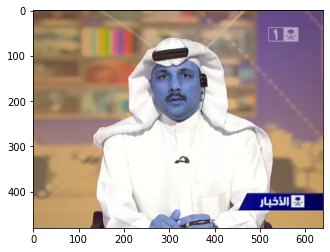

In [13]:
plt.imshow(img)

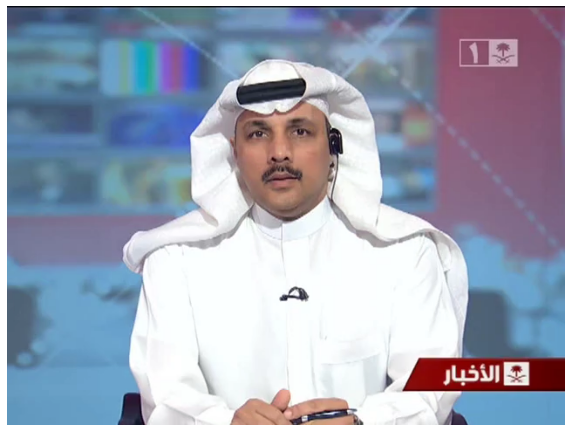

In [15]:
display_cv2_img(img) 

In [16]:
cap.release()

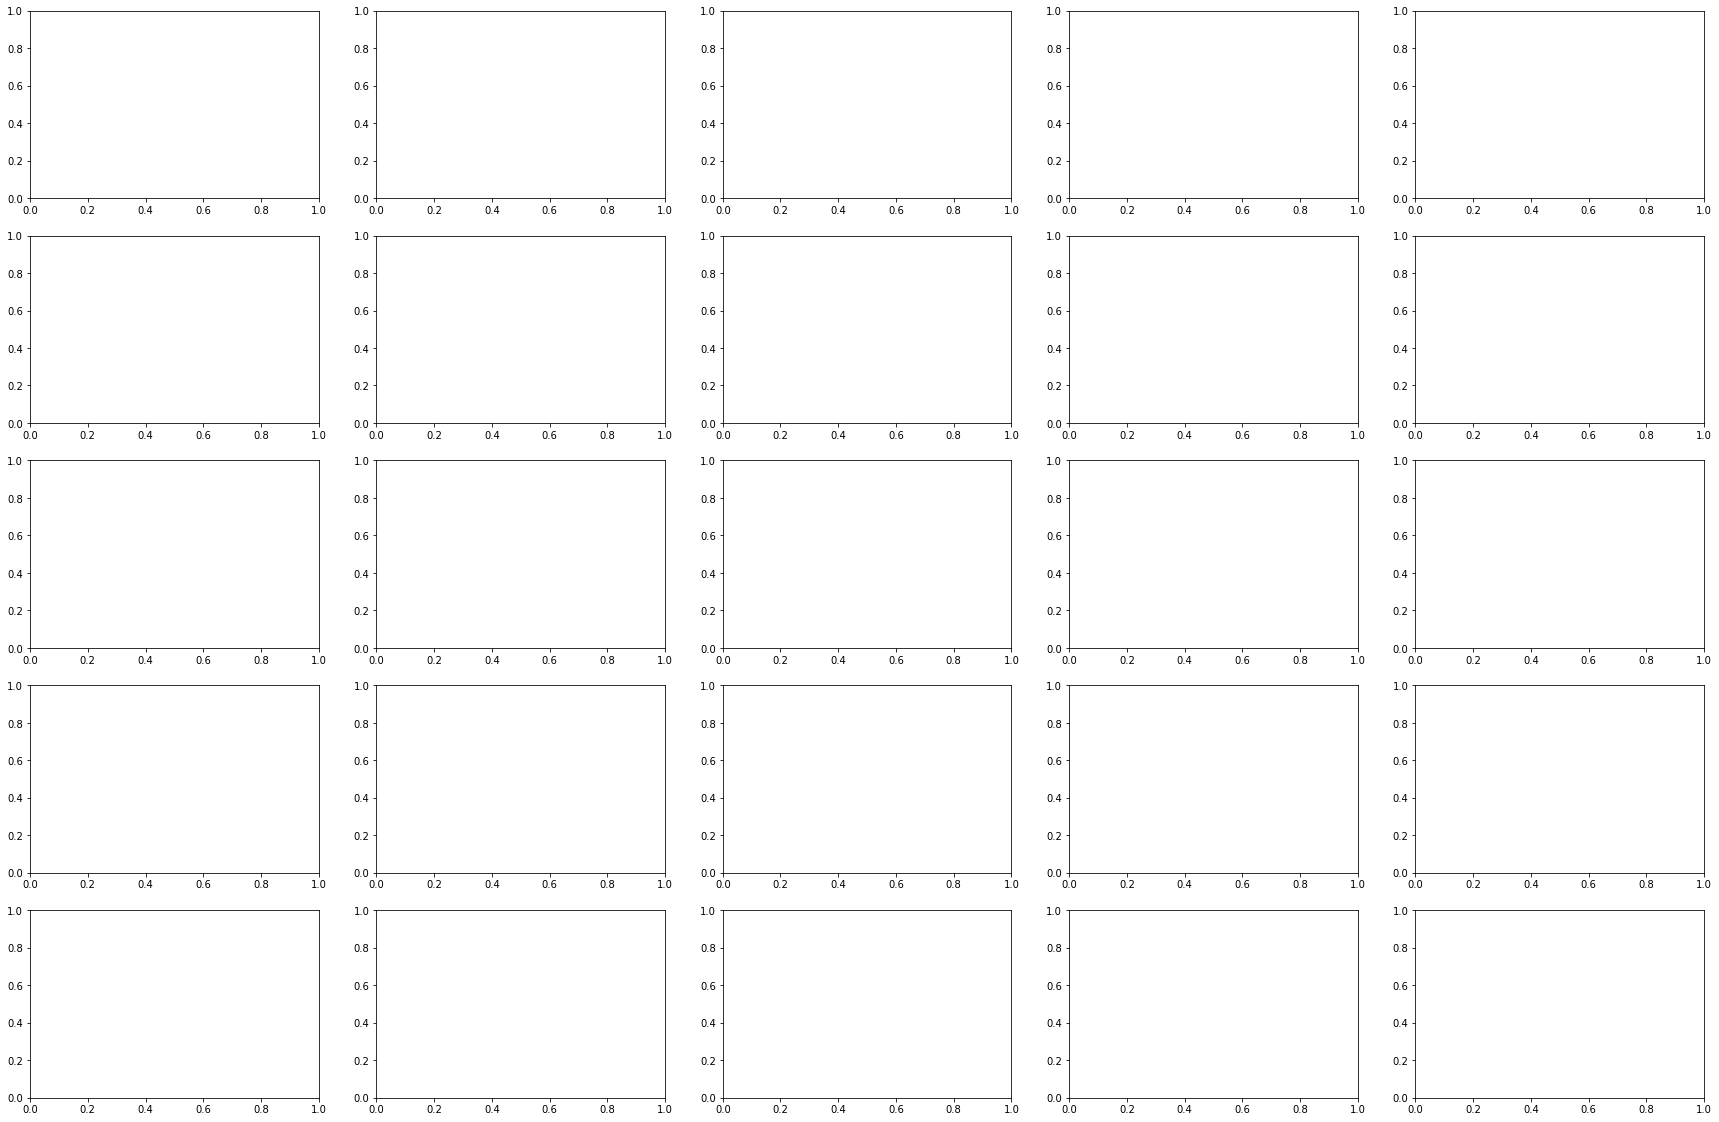

In [17]:
fig, axs = plt.subplots(5,5, figsize=(30,20))
axs = axs.flatten()

#plt.show()

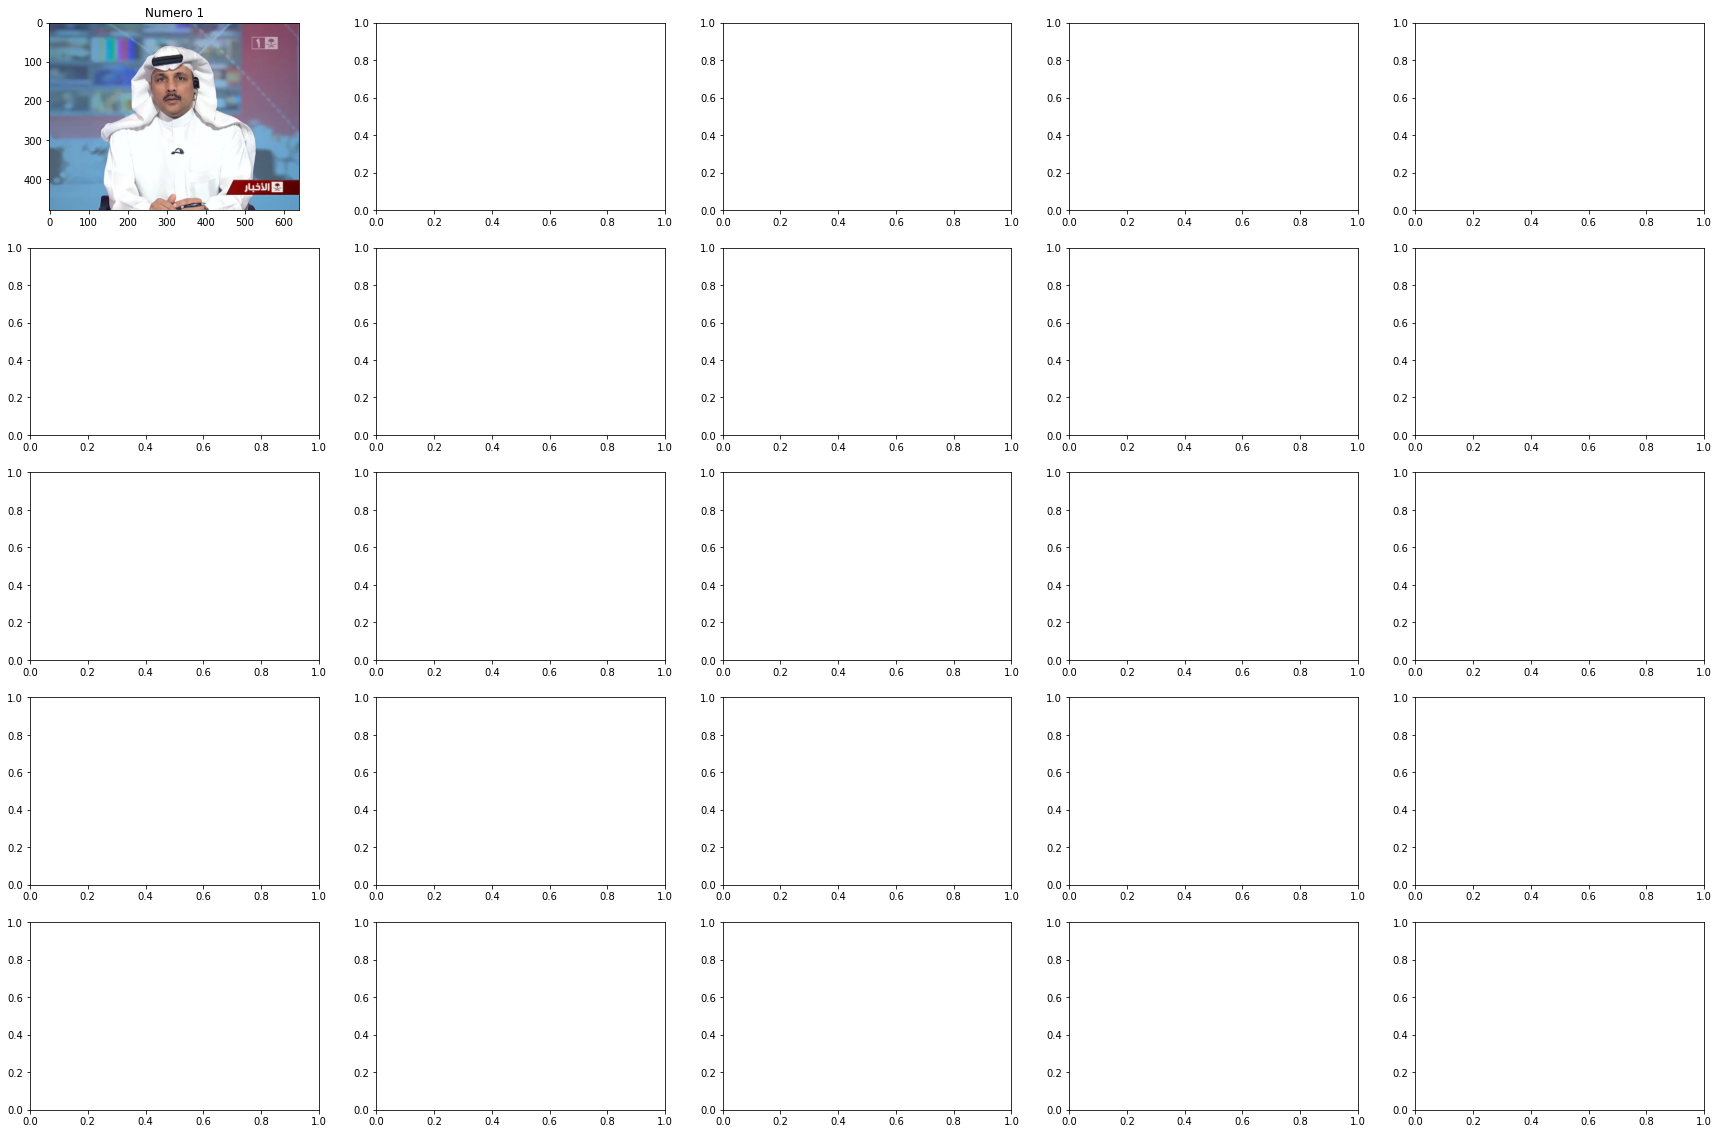

In [18]:
fig, axs = plt.subplots(5,5, figsize=(30,20))
axs = axs.flatten()
axs[0].set_title("Numero 1")
cap_ = cv2.VideoCapture(input_file)
ret_, img_ = cap_.read()
axs[0].imshow(cv2.cvtColor(img_, cv2.COLOR_BGR2RGB))
plt.show()

**DISPLAY MULTIPLE FRAME FROM THE VIDEO**

Number of frames: 396


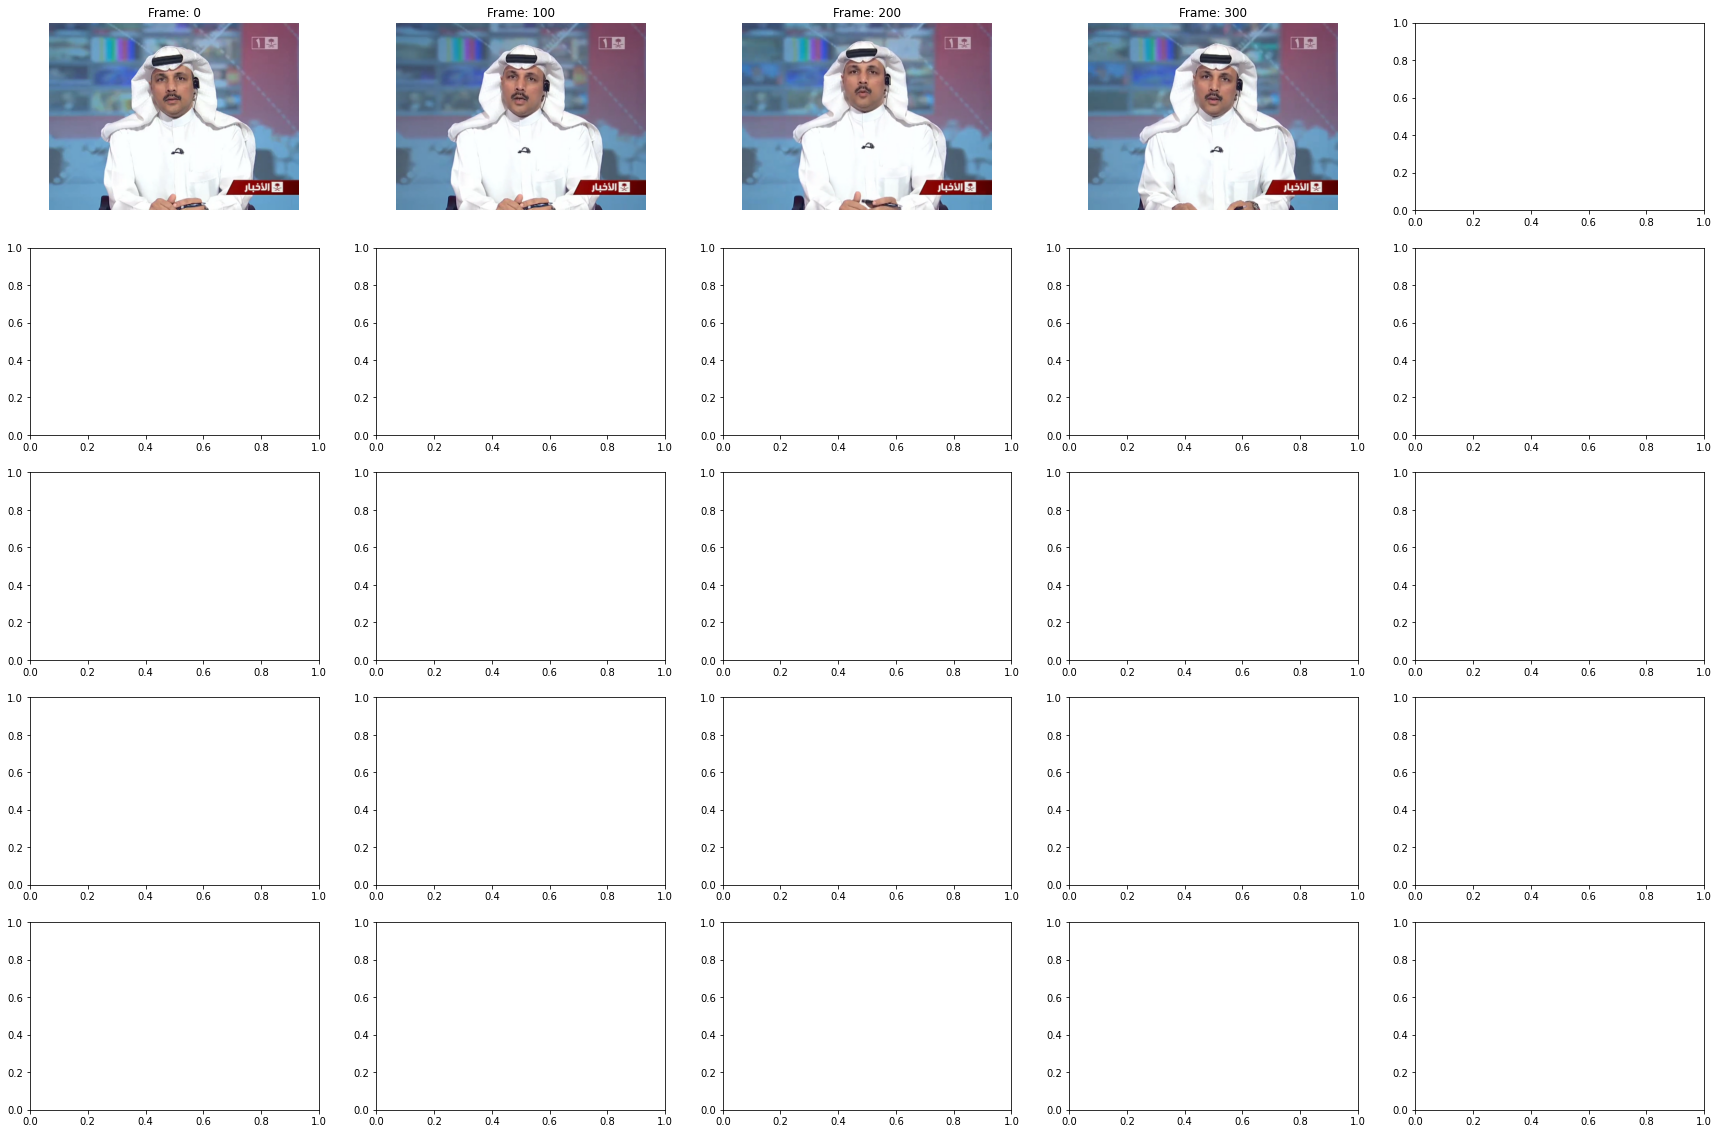

In [19]:
fig, axs = plt.subplots(5,5, figsize=(30,20))
axs = axs.flatten()


cap = cv2.VideoCapture(input_file)
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print("Number of frames:", n_frames)

img_idx=0
for frame in range(n_frames):
  ret, img = cap.read()
  #plt.imshow(img)
  if ret == False:
    break
  if frame % 100 == 0:
    axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[img_idx].set_title(f'Frame: {frame}')
    axs[img_idx].axis('off')
    img_idx += 1

##plt.tight_layout()
##plt.show()
##cap.release()



**ADD ANOTATIONS TO VIDEO IMAGES**

In [32]:
cv2.imwrite('/content/drive/MyDrive/VISIOPE_PROJECT/data/00.jpg' , img)

True